### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GauriPaithankar/Datasets/main/bank-full.csv", delimiter = ";")

### data exploration

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.rename(columns={'y': 'Subscription'})

In [10]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


### label encoding

In [11]:
from sklearn import preprocessing

In [12]:
label_encoder = preprocessing.LabelEncoder()  

In [13]:
df['Subscription']= label_encoder.fit_transform(df['Subscription'])

In [14]:
df['Subscription'].unique()

array([0, 1])

In [15]:
df['marital']= label_encoder.fit_transform(df['marital'])

In [16]:
df['marital'].unique()

array([1, 2, 0])

In [17]:
df['education']= label_encoder.fit_transform(df['education'])
df['education'].unique()

array([2, 1, 3, 0])

In [18]:
df['job']= label_encoder.fit_transform(df['job'])
df['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [19]:
df['loan']= label_encoder.fit_transform(df['loan'])
df['loan'].unique()

array([0, 1])

In [20]:
df['housing']= label_encoder.fit_transform(df['housing'])
df['housing'].unique()

array([1, 0])

In [21]:
df['default']= label_encoder.fit_transform(df['default'])
df['default'].unique()

array([0, 1])

In [22]:
df['contact']= label_encoder.fit_transform(df['contact'])
df['contact'].unique()

array([2, 0, 1])

In [23]:
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['poutcome'].unique()

array([3, 0, 1, 2])

In [24]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0


In [25]:
df.drop(['month', 'day'], axis=1, inplace=True)

In [26]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Subscription
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0


### checking correlation

<Axes: >

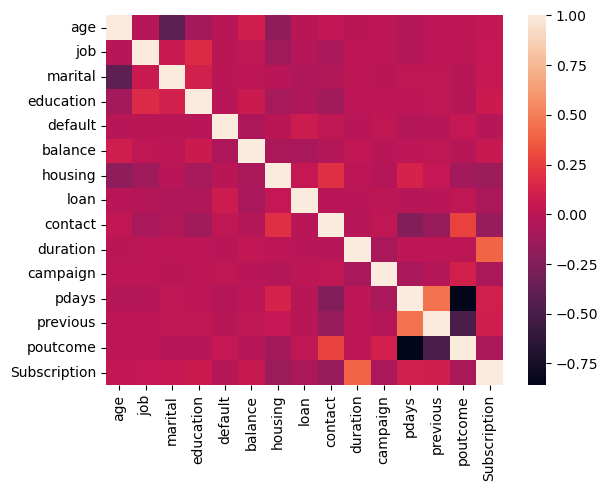

In [27]:
sns.heatmap(df.corr())

### model building

### assigning x & y values

In [28]:
x = df.drop(['Subscription'], axis=1).values
y = df['Subscription'].values

In [29]:
x.shape

(45211, 14)

In [30]:
y.shape

(45211,)

### split data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)

In [32]:
X_train.shape

(36168, 14)

In [33]:
y_train.shape

(36168,)

### data scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [35]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [36]:
X_test.shape

(9043, 14)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [38]:
dt.fit( X_train, y_train )

DecisionTreeClassifier()

In [39]:
dt_pred = dt.predict(X_test)

In [40]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Accuracy

In [42]:
print("Training score:  ", round(dt.score(X_train, y_train)*100,2))
print("Testing score:  ", round(dt.score(X_test, y_test)*100,2))

Training score:   100.0
Testing score:   85.34


In [43]:
from sklearn.model_selection import cross_val_score

### Cross Validation

In [44]:
print("Training cross val score:  ", round(((cross_val_score(dt, X_train, y_train)).mean())*100,2))
print("Testing cross val score:  ", round(((cross_val_score(dt,  X_test, y_test)).mean())*100,2))

Training cross val score:   85.94
Testing cross val score:   85.12


In [45]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Accuracy: 0.8533672453831693

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      7926
           1       0.40      0.39      0.40      1117

    accuracy                           0.85      9043
   macro avg       0.66      0.65      0.66      9043
weighted avg       0.85      0.85      0.85      9043


Confusion Matrix:
 [[7280  646]
 [ 680  437]]
